In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/oral-diseases",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 5000 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['Calculus', 'Caries', 'Gingivitis', 'Hypodontia']

In [5]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [6]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:
input_shape=(BATCH_SIZE,None,None,CHANNELS)
n_classes = 4
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
EPOCHS = 25
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25
125/125 [==============================] - 251s 2s/step - loss: 1.2986 - accuracy: 0.3687 - val_loss: 1.0595 - val_accuracy: 0.5250
Epoch 2/25
125/125 [==============================] - 187s 1s/step - loss: 1.0142 - accuracy: 0.5538 - val_loss: 0.9565 - val_accuracy: 0.5521
Epoch 3/25
125/125 [==============================] - 179s 1s/step - loss: 0.8722 - accuracy: 0.6159 - val_loss: 0.7481 - val_accuracy: 0.6812
Epoch 4/25
125/125 [==============================] - 185s 1s/step - loss: 0.7990 - accuracy: 0.6542 - val_loss: 0.6764 - val_accuracy: 0.7167
Epoch 5/25
125/125 [==============================] - 179s 1s/step - loss: 0.7296 - accuracy: 0.6856 - val_loss: 0.6513 - val_accuracy: 0.6958
Epoch 6/25
125/125 [==============================] - 177s 1s/step - loss: 0.6874 - accuracy: 0.7090 - val_loss: 0.6601 - val_accuracy: 0.7208
Epoch 7/25
125/125 [==============================] - 177s 1s/step - loss: 0.6356 - accuracy: 0.7306 - val_loss: 0.6913 - val_accuracy: 0.6854

In [14]:
scores = model.evaluate(test_ds)

17/17 [==============================] - 10s 282ms/step - loss: 0.5658 - accuracy: 0.7615


In [15]:
scores

[0.5658347606658936, 0.7615384459495544]

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
history.history['accuracy']

[0.36871227622032166,
 0.553822934627533,
 0.6159456968307495,
 0.6541750431060791,
 0.6856136918067932,
 0.7090040445327759,
 0.7306337952613831,
 0.739185094833374,
 0.7582998275756836,
 0.7598088383674622,
 0.7676056623458862,
 0.7794265747070312,
 0.7889838814735413,
 0.7927565574645996,
 0.7902414202690125,
 0.7945170998573303,
 0.8075955510139465,
 0.809356153011322,
 0.8113682270050049,
 0.8141348361968994,
 0.8252012133598328,
 0.8324949741363525,
 0.8184104561805725,
 0.8347585797309875,
 0.8372736573219299]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

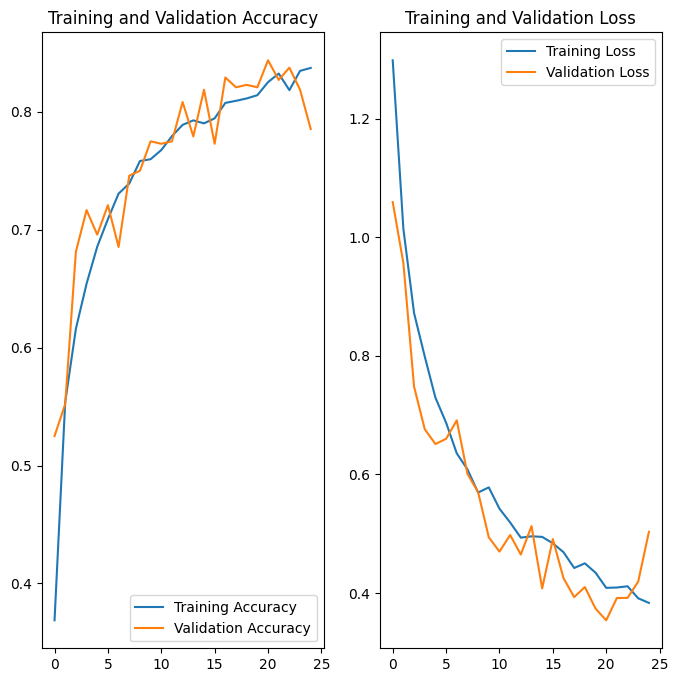

In [19]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: Hypodontia
1/1 [==============================] - 0s 443ms/step
predicted label: Hypodontia


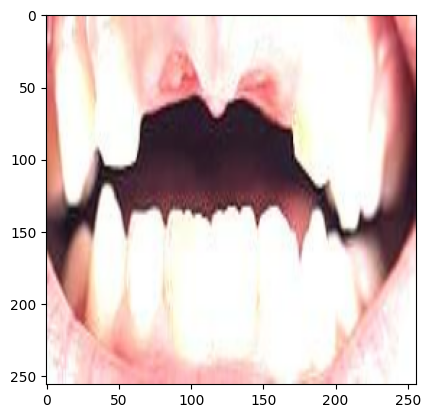

In [20]:
import numpy as np
for images_batch, labels_batch, in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("first image's actual label:",class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [21]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])),2)
  return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


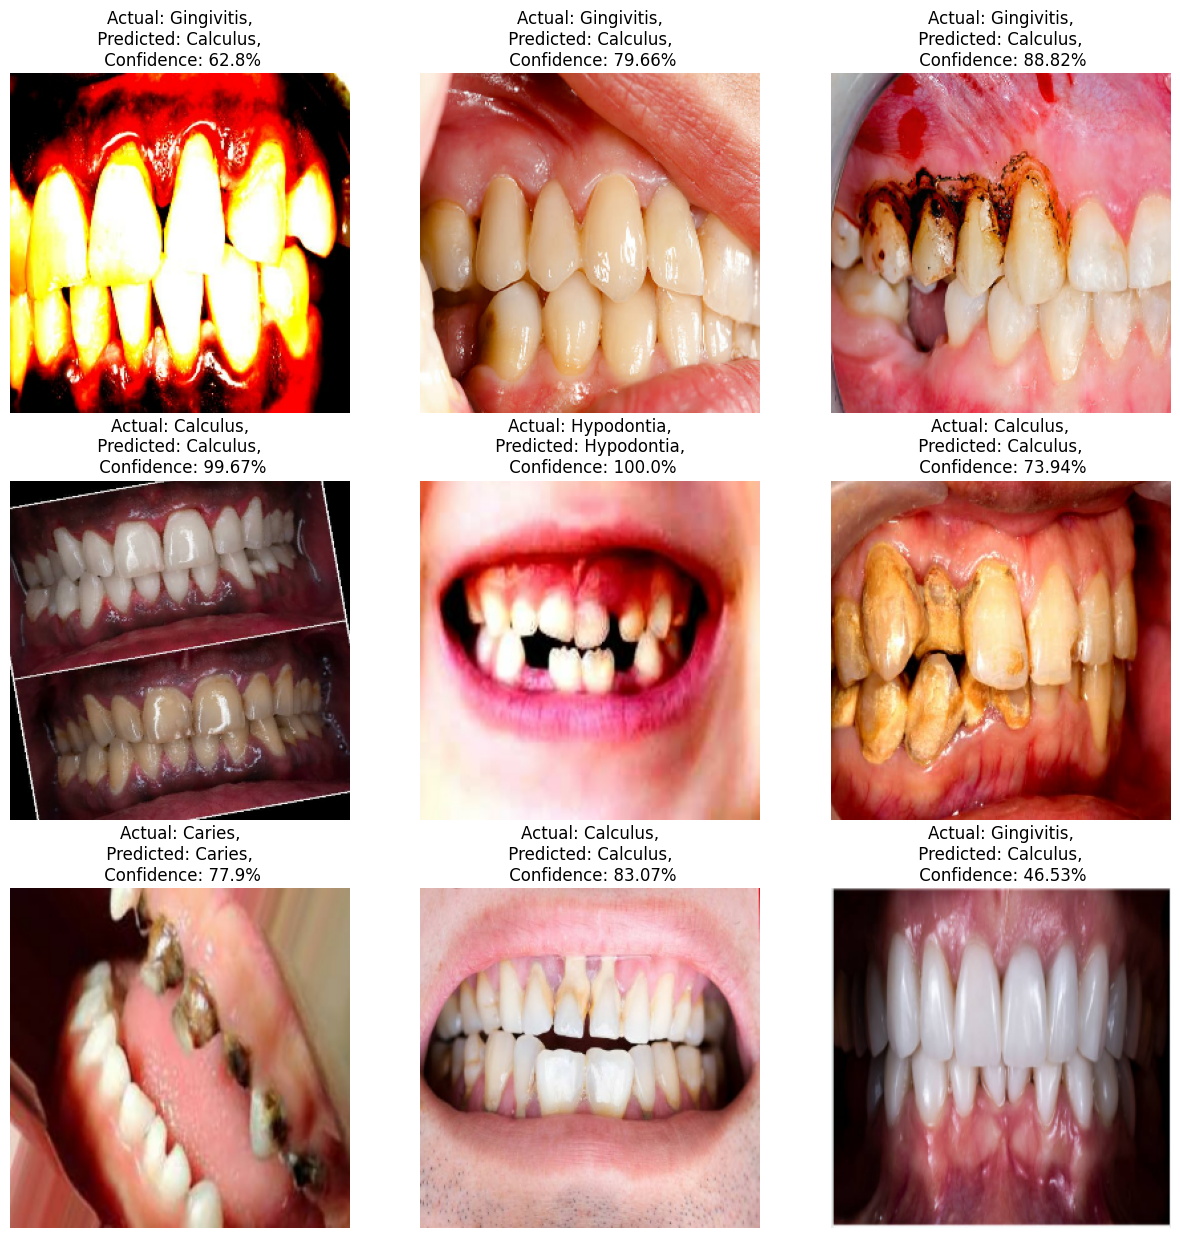

In [22]:
plt.figure(figsize=(15,15))
for images, labels, in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")


    plt.axis("off")

In [23]:
model_version = 3
model.save(f"dms-api/{model_version}")

INFO:tensorflow:Assets written to: dms-api/3\assets


INFO:tensorflow:Assets written to: dms-api/3\assets
